## B. Computational Problems

### Problem B.1

#### For the teengamb data, fit a model with gamble as the response and the other variables as predictors. Look for violations of:

1. Constant Variance
2. Normality
3. Linearity
4. Look for (a) outliers, (b) leverage points, and (b) potentially influential points. This part of the problem requires some self-study about defining and identifying leverage points, and describing the relationship between leverage and influence. Chapter 6 of *Linear Models with R* (pdf on Canvas) may help!**

#### Write a short report detailing your findings.

sex,status,income,verbal,gamble
1,51,2.00,8,0.0
1,28,2.50,8,0.0
1,37,2.00,6,0.0
1,28,7.00,4,7.3
1,65,2.00,8,19.6
1,61,3.47,6,0.1



Call:
lm(formula = gamble ~ ., data = teengamb)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.082 -11.320  -1.451   9.452  94.252 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.55565   17.19680   1.312   0.1968    
sex         -22.11833    8.21111  -2.694   0.0101 *  
status        0.05223    0.28111   0.186   0.8535    
income        4.96198    1.02539   4.839 1.79e-05 ***
verbal       -2.95949    2.17215  -1.362   0.1803    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22.69 on 42 degrees of freedom
Multiple R-squared:  0.5267,	Adjusted R-squared:  0.4816 
F-statistic: 11.69 on 4 and 42 DF,  p-value: 1.815e-06


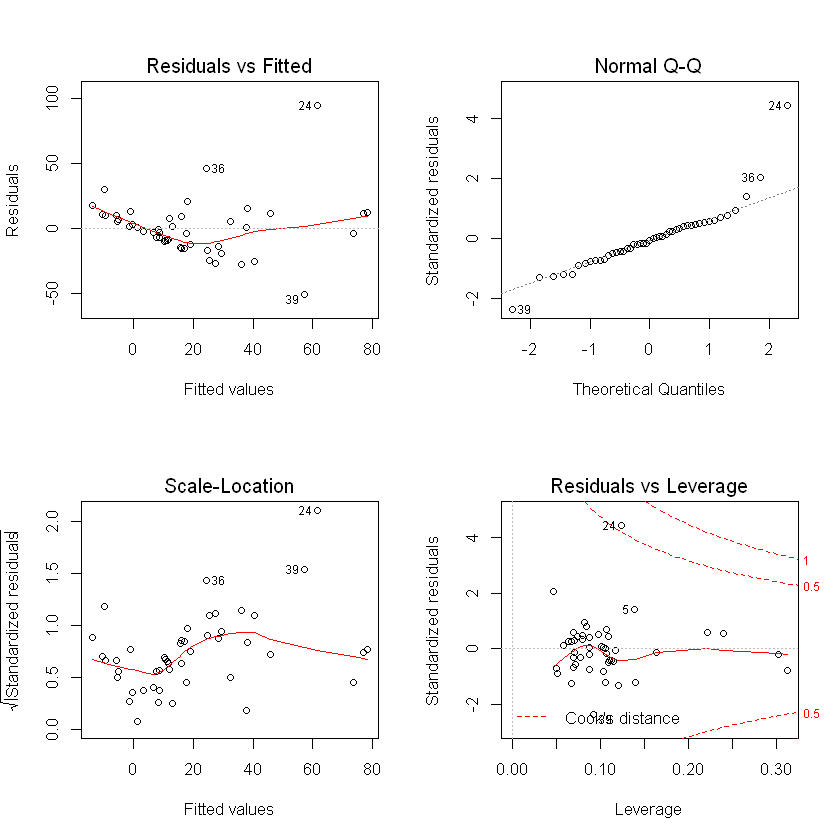

In [1]:
library(faraway)
data(teengamb)
head(teengamb)
lmod <- lm(gamble~., data=teengamb)
summary(lmod)
par(mfrow=c(2,2))

plot(lmod)

#### Constant variance - Yes, there is a viloation of the constant variance assumpation. If we look at the Residuals vs Fitted Plot, we see a curvature in the plot, there is no constant variance displayed in the plot. 

#### Normality - No, there is no violation of the normality assumpation. If we look at the QQ plot, we can see only in the tail ends of the top and the bottom we see some points off the center line, note the points 36, 24 and 39. However, we can note most of the points are on the straight line which can enable us to conclude that normality is not violated.

#### Linearity - Since we note a curvature in the residuals vs fitted value plot, we can conclude that linearity assumpation is violated. 

# Outliers

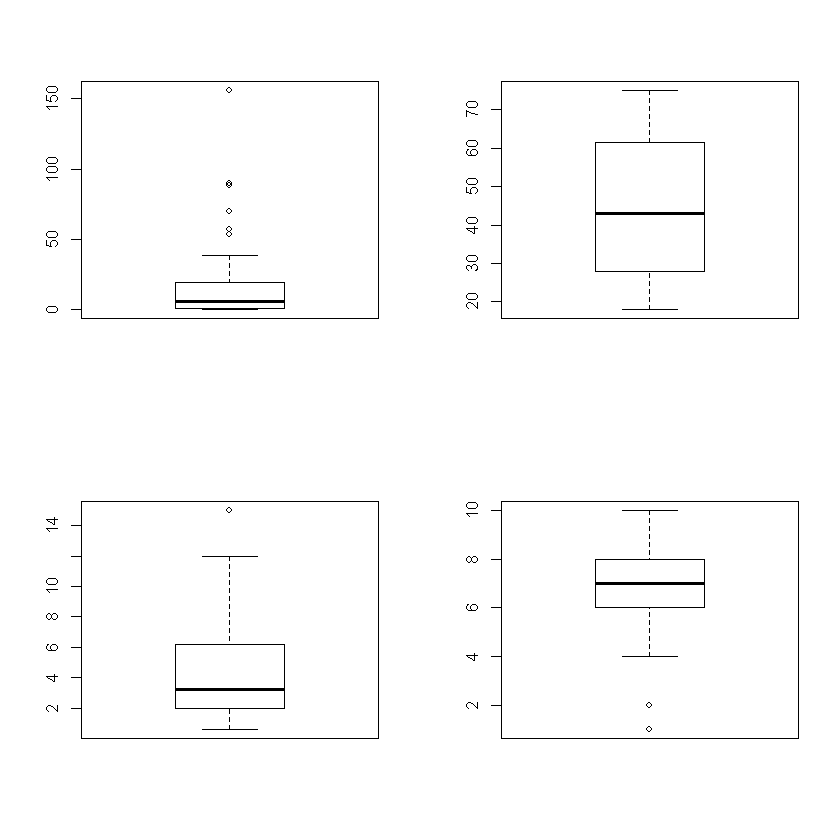

In [2]:
par(mfrow=c(2,2))

boxplot(teengamb$gamble, data = teengamb)
boxplot(teengamb$status, data = teengamb )
boxplot(teengamb$income, data = teengamb )
boxplot(teengamb$verbal, data = teengamb )

#### Note, i used boxplots to show the outliers. Those points outside the boxplots are the outliers for the respective variables.

# Leverage Points

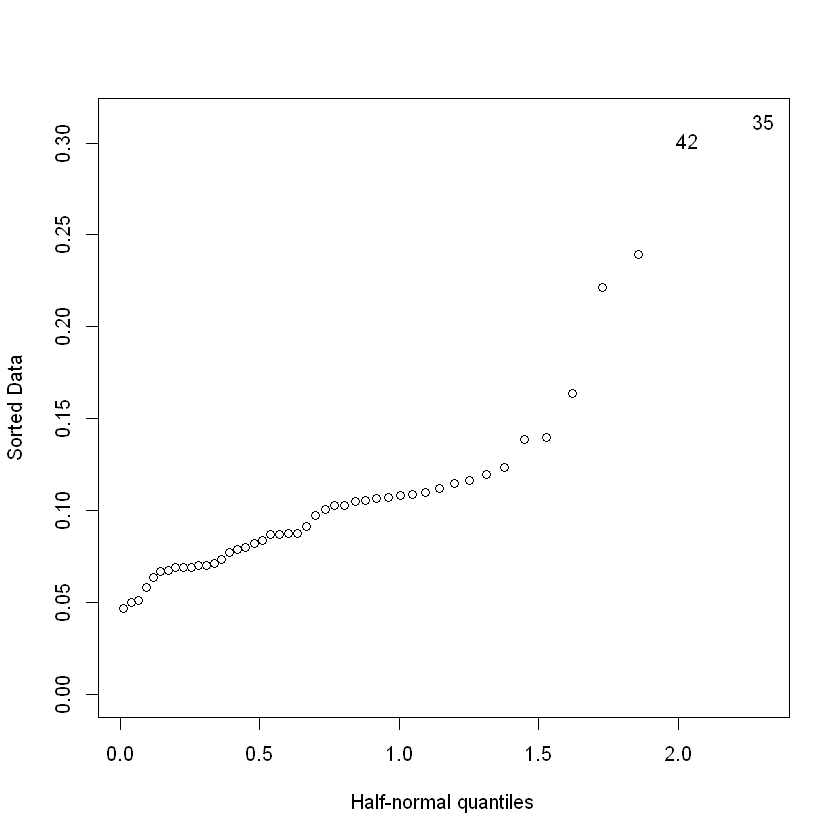

In [3]:
hatv <- hatvalues(lmod) #Regression Deletion Diagnostics

halfnorm(hatv) #Half Normal Plot 

#### Point 42 and 35 are the Leverage points.

# Influential points

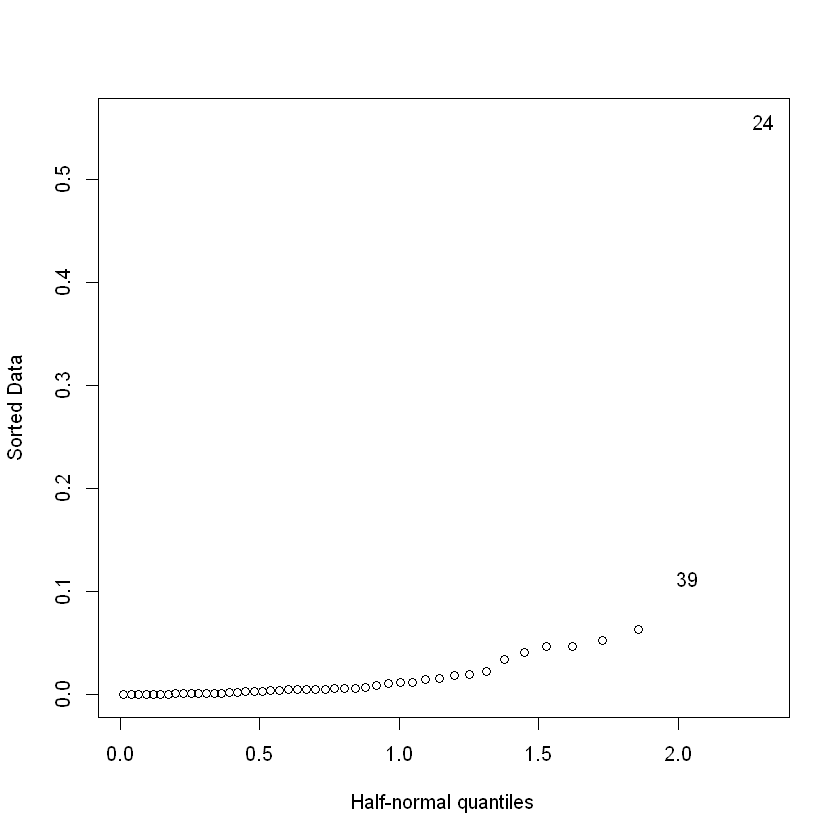

In [4]:
ip <-cooks.distance(lmod)

halfnorm(ip)

#### We can note that the Influential points are point 24 and 39.

### Problem B.2

This [link](https://www.colorado.edu/amath/sites/default/files/attached-files/advertising.txt) contains advertising data. This dataset contains, in thousands of dollars, TV, Radio, and Newspaper budgets for 200 different markets along with the Sales, in thousands of units, for each market.

#### (a) Fit the SLR model with sales as the response and radio as the predictor. Perform some diagnostic tests to see whether any SLR assumptions have been violated. Explain your findings.

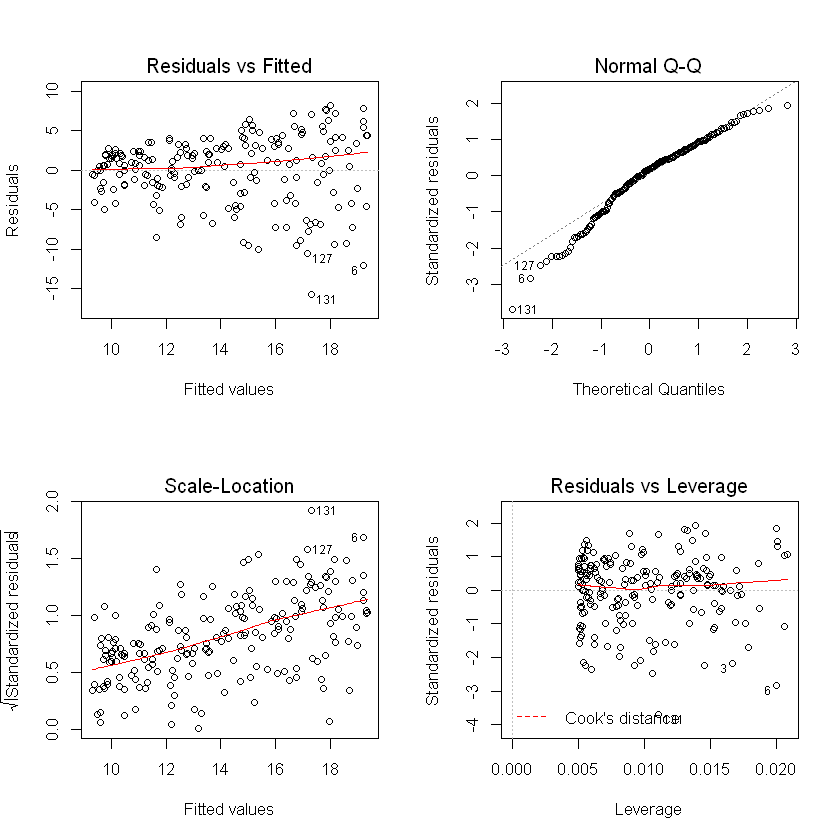

In [5]:
adv <- read.csv("https://www.colorado.edu/amath/sites/default/files/attached-files/advertising.txt", sep = "")

lmod.1 <- lm(sales ~ radio, data = adv)

par(mfrow=c(2,2))

plot(lmod.1)

#### Constant variance assumption is violated because the variance is not constant along the fitted values.

#### Linearity condition is not violated as we do not note any curvature in the residuals vs fitted plot.

#### There is violation of the normality assumpation. If we look at the QQ plot, we can see that in the tail ends of the top and the bottom we see many points off the center line. Since, most points do not lie on the straight line, normality assumpation is vilolated. 

#### (b) Produce a plot that isolates the effect of TV on sales (adjusting for radio). What does this plot suggest about the relationship between these two variables?

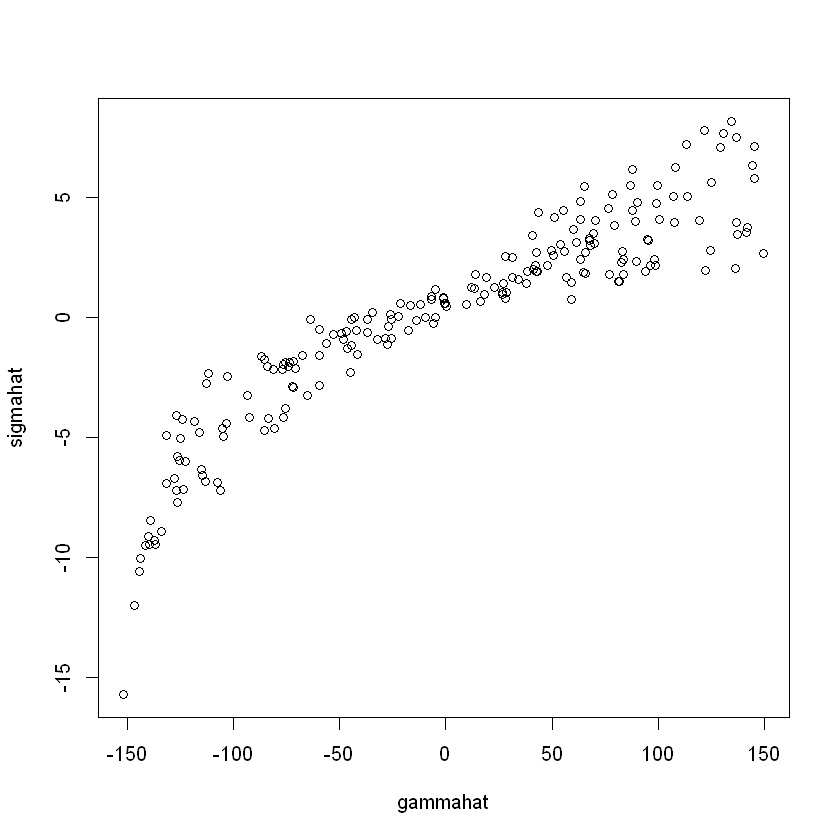

In [6]:
gammahat<-resid(lm(TV~radio,data=adv))
sigmahat<-resid(lmod.1)
plot(gammahat,sigmahat)

#### Based on the above plot, we can note that there seems to be a relationship between this two variables. As the gammahat increases, the sigmahat also seems to be increasing.

#### (c) Produce a plot that isolates the effect of newspaper on sales (adjusting for radio). What does this plot suggest about the relationship between these two variables?

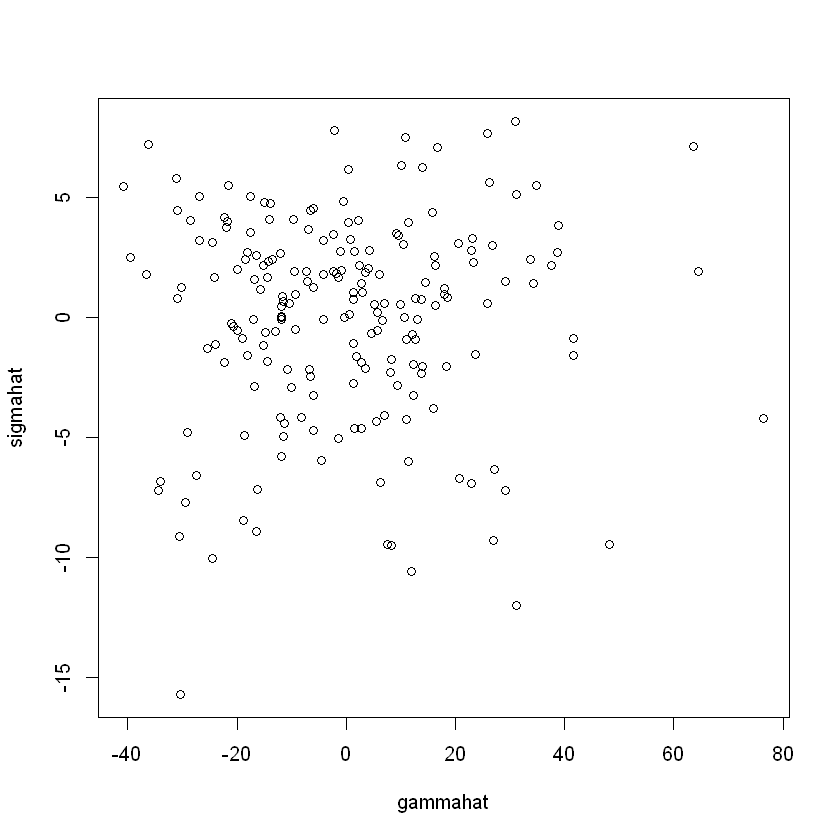

In [7]:
gammahat<-resid(lm(newspaper~radio,data=adv))
sigmahat<-resid(lmod.1)
plot(gammahat,sigmahat)

#### No, i do not see any relationship between the two variables. The residual points in the above plot seems to be well dispersed. 

#### (d) Fit the MLR model that includes radio and TV. Does the inclusion of this predictor fix any issues that you dioagnosed in part (a)? Does it add any other issues?


Call:
lm(formula = sales ~ TV + radio, data = adv)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7977 -0.8752  0.2422  1.1708  2.8328 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.92110    0.29449   9.919   <2e-16 ***
TV           0.04575    0.00139  32.909   <2e-16 ***
radio        0.18799    0.00804  23.382   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.681 on 197 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8962 
F-statistic: 859.6 on 2 and 197 DF,  p-value: < 2.2e-16


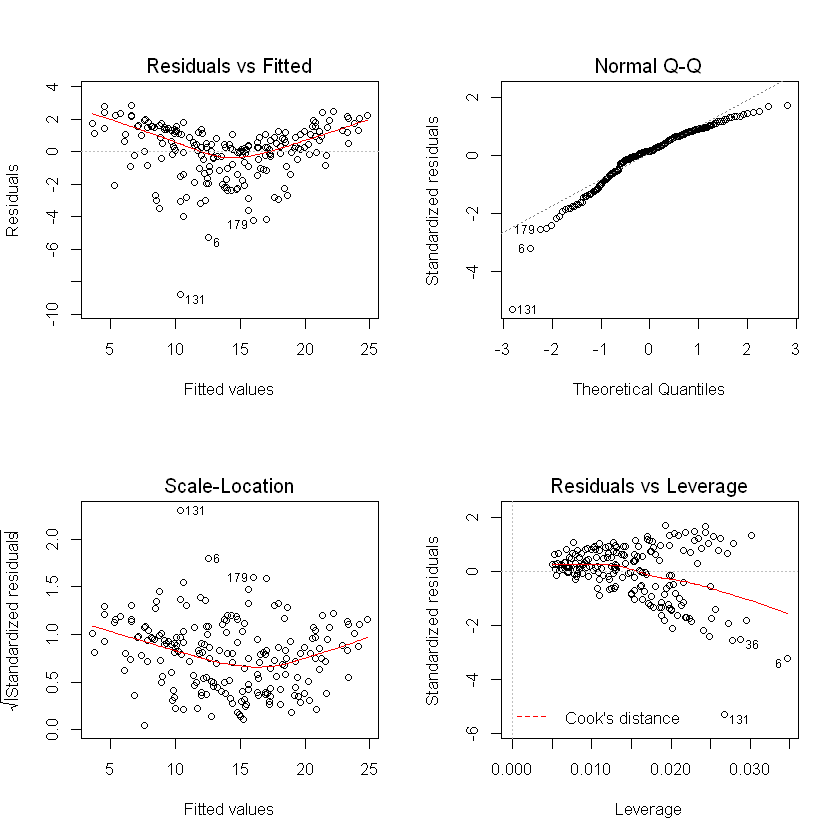

In [8]:
lmod.3 <- lm(sales ~ TV + radio, data = adv)
summary(lmod.3)

par(mfrow=c(2,2))

plot(lmod.3)

#### No, the inclusion of this predictor does not fix the issues diagnosed in part (a) in this problem. 

#### Yes, it adds more problems, now the linearity condition is violated, we can see a curvature in the Residuals vs Fitted Values plot. 

#### (e) Add TV^2 to the MLR model in part (d). How did this change the fit of the model? What conclusions might you draw?


Call:
lm(formula = sales ~ TV + radio + I(TV^2), data = adv)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3860 -0.8822 -0.0498  0.9613  3.5725 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.288e+00  3.588e-01   3.588 0.000421 ***
TV           7.844e-02  4.985e-03  15.736  < 2e-16 ***
radio        1.930e-01  7.293e-03  26.465  < 2e-16 ***
I(TV^2)     -1.136e-04  1.677e-05  -6.775 1.42e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.517 on 196 degrees of freedom
Multiple R-squared:  0.9167,	Adjusted R-squared:  0.9154 
F-statistic:   719 on 3 and 196 DF,  p-value: < 2.2e-16


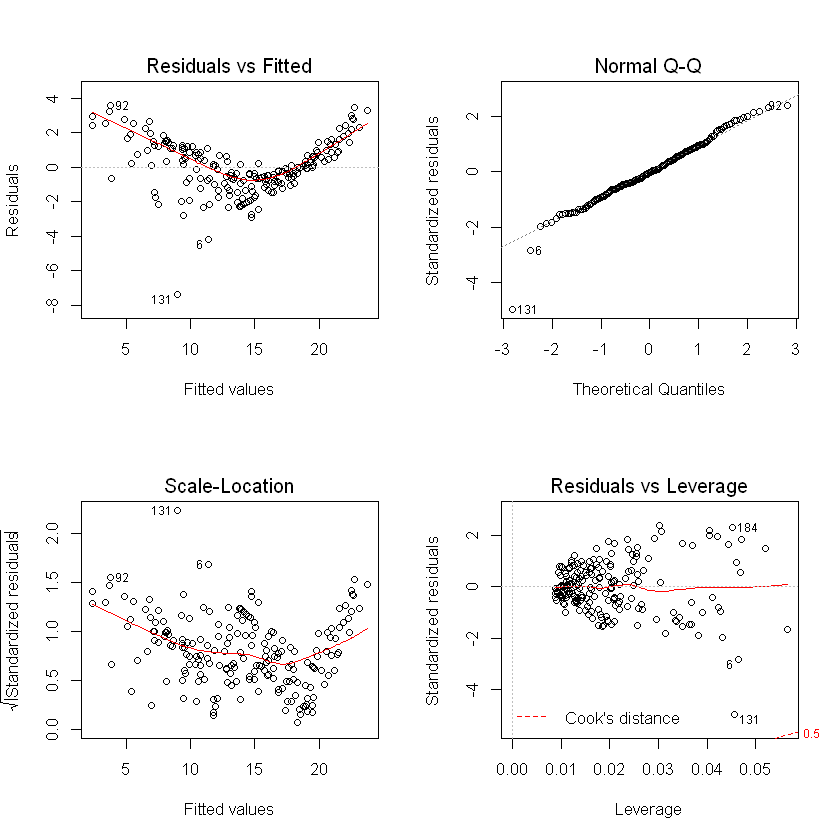

In [9]:
lmod.4 <- lm(sales ~ TV + radio + I(TV^2), data = adv)
summary(lmod.4)

par(mfrow=c(2,2))

plot(lmod.4)

#### The Model definately improved. We can see that now the normality condition is not violated. Most of the points lie on the straight line, only in the tail ends there are some points not in the straight line. 

#### Also to note, focusing on the Residuals vs Fitted values plot, we can see that the points are more concentrated when compared  to the previous plot in (d). This tells us that the spread of the variance is getting smaller but still we note that curvature in the plot ans hence conclude that there is a linearity conditions violated. 

### Problem B.3 

Researchers at the National Institutes of Standards and Technology (NIST) collected pipline data on ultrasonic measurements of the depth of defects in the Alaska pipeline in the field. The depths of the defects were then remeasured in the laboratory. The laboratory measurements are more accurate than the field measurements, but more time consuming and expensive. We want to develop a regression model for correcting the in field measurements. 

#### (a) Fit a regression model where Lab is the response and Field is the predictor. Check for non-constant variance. 

Field,Lab,Batch
18,20.2,1
38,56.0,1
15,12.5,1
20,21.2,1
18,15.5,1
36,39.0,1


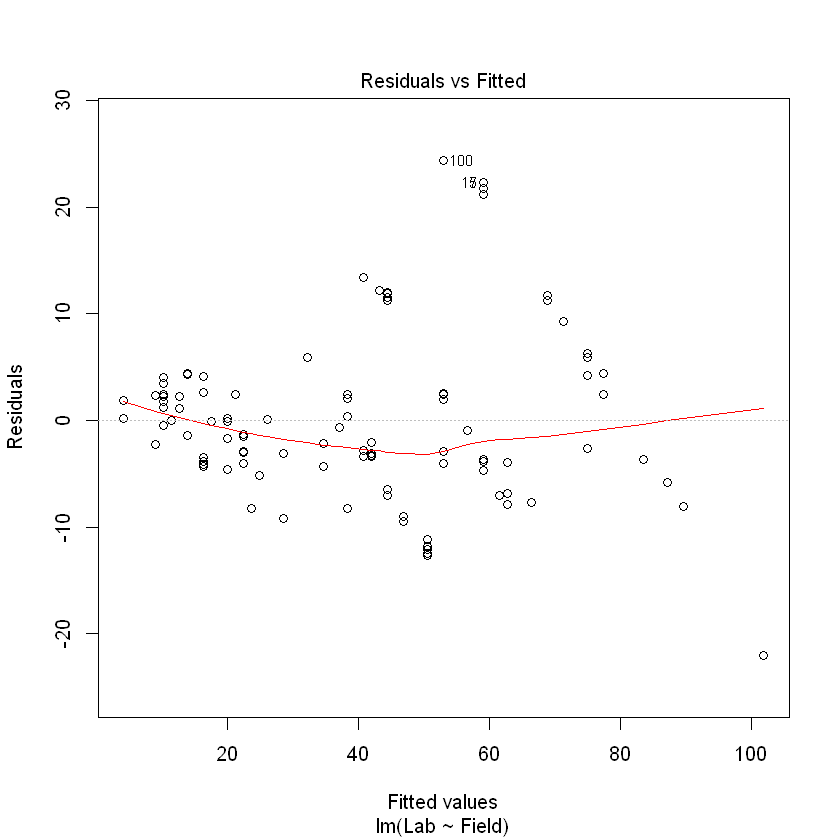

In [10]:
library(faraway)
data(pipeline); 
head(pipeline)

lmod.5 <- lm(Lab~Field, data=pipeline)
plot(lmod.5,1)


#### I just generated the plot to check for the non-constant variance. As we can see in the above plot, the spread in the variance tend to be increasing and hence we can conclude there is no constant variance. 

#### (b) Sometimes transforming the response and predictor helps in stabilizing variance. Find a transformation on Lab and/or Field so that in the transformed scale the relationship is approximately linear with constant variance. Restrict your choice of transformation to square root, log, and inverse.

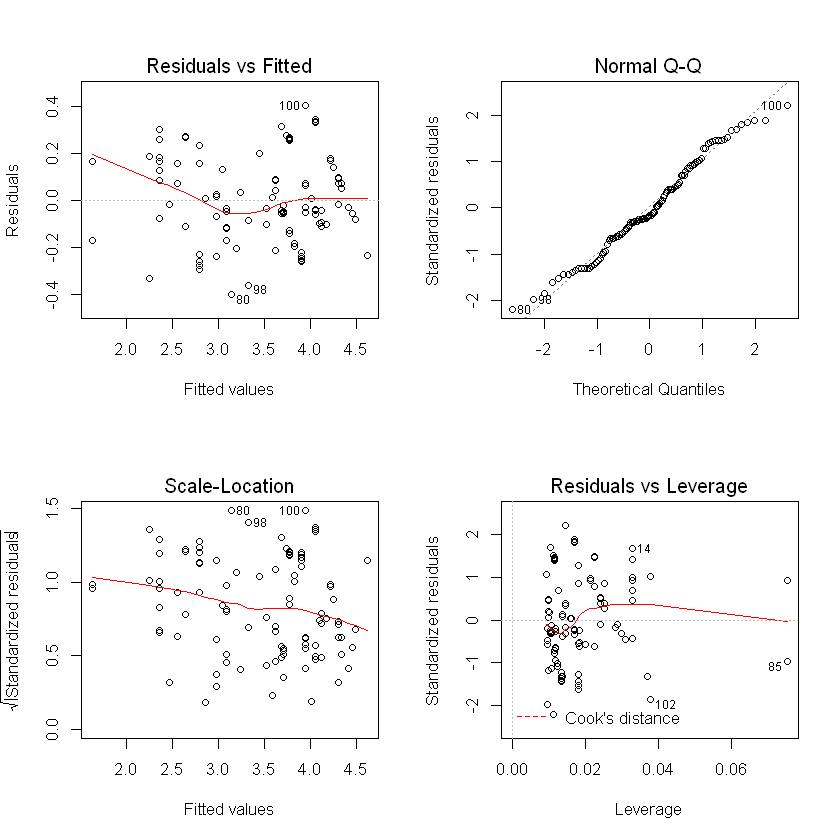

In [11]:
lmod.6 <- lm(log(Lab)~log(Field), data=pipeline)
par(mfrow=c(2,2))
plot(lmod.6)

#### (c) Now let's try weighted least squares. The code below splits the range of Field into 12 groups of size nine (except for the last goup which has only eight values). Within each group, we compute the variance of Lab as varlab and the mean of Field as meanfield. Add comments to the code to demonstrate what each line is doing.

In [12]:
i = order(pipeline$Field); # Ordering the Field in ascending order. i returns the vector positions but we cannot do any analysis
                           # with this. We need to get back what each vector position means which is exactly what the next code
                           # is doing. 

npipe = pipeline[i,]; # Now re-arranging the dataframe in ascending Field order as done in i and returning back all the columns
                      # The code is now storing this new dataframe into npipe variable. 

ff = gl(12,9)[-108]; # This code is now performing the grouping. Each group (Labeled from 1 to 11) has 9 values except for 
                     # last group (12) with 8 values. gl stands for generate factor levels, we are giving the argument we need
                     # 12 factor levels with 9 as the k which is an integer giving the number of replications. 108 shows the 
                     # total number but the code minus 1 from this to generate 11 groups of 9 size and 1 group of 8 size.

meanfield = unlist(lapply(split(npipe$Field,ff),mean)) # This code is using the lapply to compute the mean of each group found
                                                       # in the grouping ff. Note, split function divides the data in the 
                                                       # vector x into the groups defined by f. Here vector x is defined by
                                                       # npipe$Field and groups f is definced by ff as mentioned above. The
                                                       # The lapply applies the split function to each group level and computes
                                                       # the mean for each group and stores it in the variable meanfield. 
                                                       # now what unlist does it given a list structure x, in our case x is  
                                                       # defined as lapply(split(npipe$Field,ff),mean), unlist simplifies it 
                                                       # to produce a vector which contains all the atomic components which 
                                                       # occur in x.

varlab = unlist(lapply(split(npipe$Lab,ff),var))       # This code is using the lapply to compute the variance of each group 
                                                       # found in the grouping ff. Note, split function divides the data in the 
                                                       # vector x into the groups defined by f. Here vector x is defined by
                                                       # npipe$Field and groups f is definced by ff as mentioned above. The
                                                       # The lapply applies the split function to each group level and computes
                                                       # the variance for each group and stores it in the variable varlab. 
                                                       # now what unlist does it given a list structure x, in our case x is  
                                                       # defined as lapply(split(npipe$Field,ff),var), unlist simplifies it 
                                                       # to produce a vector which contains all the atomic components which 
                                                       # occur in x.

#### Suppose that the variance in the repsonse is linked to the predictor in the following way: $$ Var(Lab) = a_0Field^{a_2}.$$ Use simple linear regression on (transformations of) varlab and meanfield to estimate $a_0$ and $a_1$. Use these estimates to perform weighted least squares where the weights are the inverse of the variance of Lab. Print a summary of this model and comment on the fit.


Call:
lm(formula = v ~ f, data = vdf)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2038 -0.6729  0.1656  0.7205  1.1891 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -0.3538     1.5715  -0.225   0.8264  
f             1.1244     0.4617   2.435   0.0351 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.018 on 10 degrees of freedom
Multiple R-squared:  0.3723,	Adjusted R-squared:  0.3095 
F-statistic: 5.931 on 1 and 10 DF,  p-value: 0.03513


a1 is 1.12442 a0 is 0.7020209


Call:
lm(formula = Lab ~ Field, data = pipeline, weights = w)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-2.0826 -0.8102 -0.3189  0.6212  3.4429 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.49436    0.90707  -1.647    0.102    
Field        1.20828    0.03488  34.637   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.169 on 105 degrees of freedom
Multiple R-squared:  0.9195,	Adjusted R-squared:  0.9188 
F-statistic:  1200 on 1 and 105 DF,  p-value: < 2.2e-16


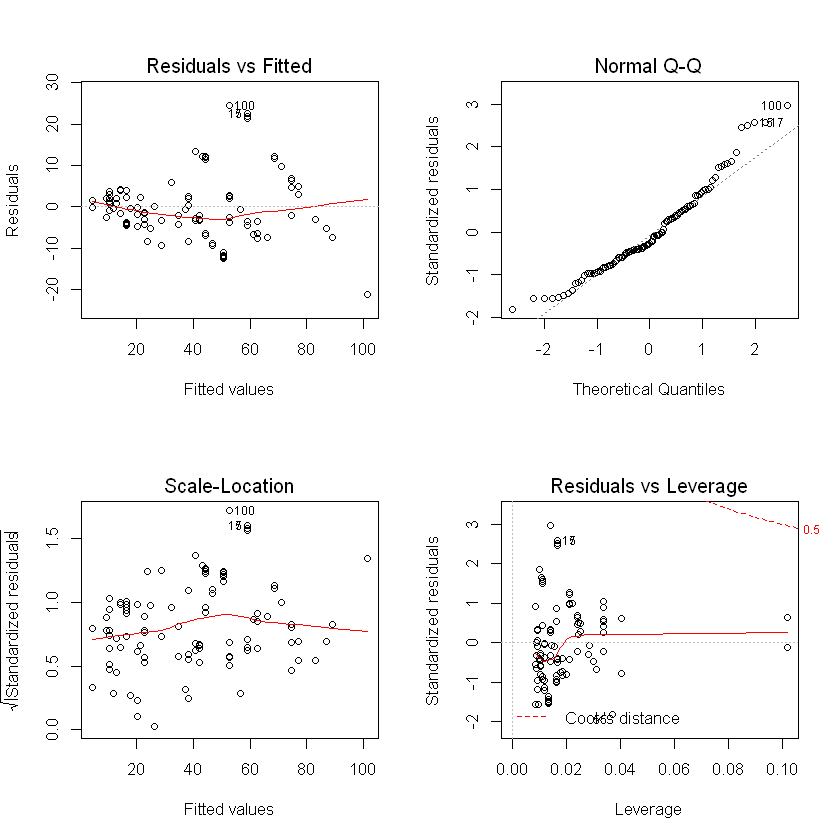

In [13]:
vdf<-data.frame(v=log(varlab),f=log(meanfield))
lmod.7<-lm(v~f,data=vdf)
summary(lmod.7)

a0<-exp(coef(lmod.7)[1])
a1<-coef(lmod.7)[2]
cat('a1 is',a1,'a0 is',a0)

vl<-a0*((pipeline$Field)^(a1))
w<-1/vl

lmod.8<-lm(Lab~Field,data=pipeline,weights=w)
summary(lmod.8)
par(mfrow=c(2,2))
plot(lmod.8)

#### The model fit is definately better. If we compare the Residuals vs Fitted plots to the previous question, the spread in the variance has decreased which is a good thing. However, we still note a curvature in the plot which means there is a violation of the linearity condition. Also, based on the QQ plot, the normality condition seem to not be violated, most of the points seem to fall on the straight line and only on the tail ends, the points seem to fall outside the straight line. 